In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn import svm
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import seaborn as sns
from matplotlib.colors import ListedColormap

In [2]:
df = pd.read_csv('/media/raian/Projects/Datasets/UCI-HeartDisease/processed.cleveland_test.csv', header=None)
df
df.columns = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']
df



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


(array([ 1., 10., 33., 38., 37., 60., 64., 43., 14.,  3.]),
 array([29. , 33.8, 38.6, 43.4, 48.2, 53. , 57.8, 62.6, 67.4, 72.2, 77. ]),
 <BarContainer object of 10 artists>)

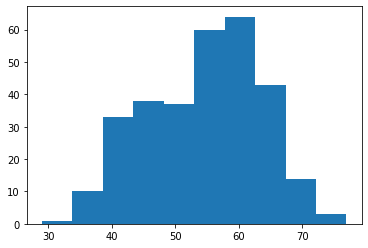

In [3]:
df.shape
plt.hist(df['age'])

(array([ 97.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 206.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

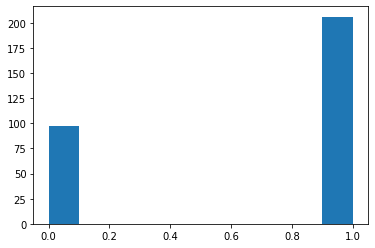

In [4]:
plt.hist(df['sex'])
#1 = male; 0 = female
# male > female (almost double)


(array([ 23.,   0.,   0.,  50.,   0.,   0.,  86.,   0.,   0., 144.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <BarContainer object of 10 artists>)

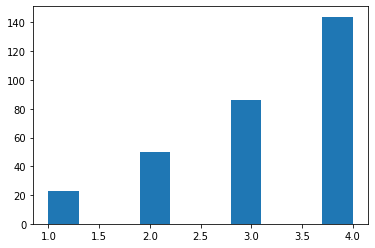

In [5]:
plt.hist(df['cp'])
# asymptomatic highest
#chest pain type
# -- Value 1: typical angina
#         -- Value 2: atypical angina
#         -- Value 3: non-anginal pain
#         -- Value 4: asymptomatic

(array([10., 42., 67., 74., 56., 27., 14.,  8.,  3.,  2.]),
 array([ 94. , 104.6, 115.2, 125.8, 136.4, 147. , 157.6, 168.2, 178.8,
        189.4, 200. ]),
 <BarContainer object of 10 artists>)

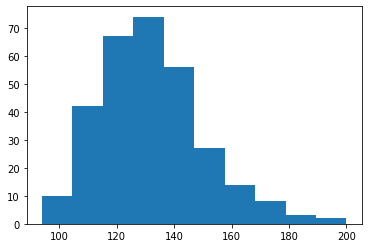

In [6]:
plt.hist(df['trestbps'])
# resting blood pressure (in mm Hg on admission to the hospital)

(array([ 12.,  72., 106.,  69.,  36.,   3.,   4.,   0.,   0.,   1.]),
 array([126. , 169.8, 213.6, 257.4, 301.2, 345. , 388.8, 432.6, 476.4,
        520.2, 564. ]),
 <BarContainer object of 10 artists>)

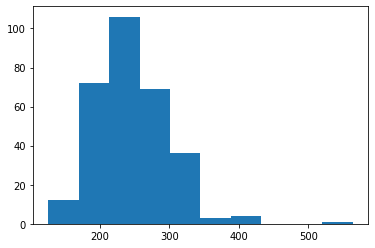

In [7]:
plt.hist(df['chol'])

(array([258.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  45.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

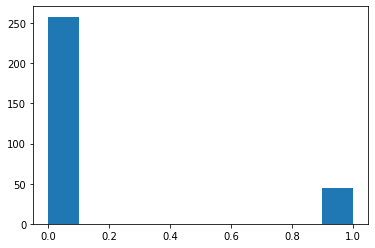

In [8]:
plt.hist(df['fbs'])

(array([151.,   0.,   0.,   0.,   0.,   4.,   0.,   0.,   0., 148.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

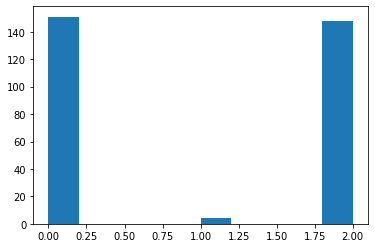

In [9]:
plt.hist(df['restecg'])

(array([ 1.,  6., 11., 26., 35., 53., 78., 62., 26.,  5.]),
 array([ 71. ,  84.1,  97.2, 110.3, 123.4, 136.5, 149.6, 162.7, 175.8,
        188.9, 202. ]),
 <BarContainer object of 10 artists>)

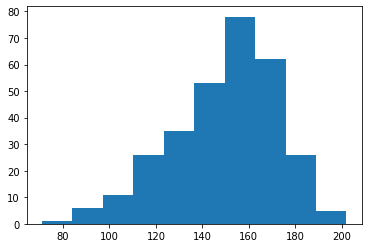

In [10]:
plt.hist(df['thalach'])

(array([204.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  99.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

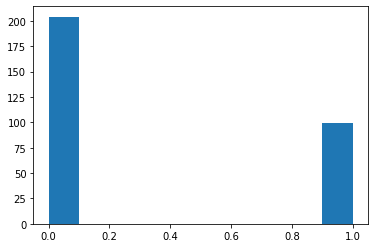

In [11]:
plt.hist(df['exang'])
#exercise induced angina
#half of the patients didn't have it

(array([149.,  50.,  40.,  24.,  20.,  11.,   6.,   1.,   0.,   2.]),
 array([0.  , 0.62, 1.24, 1.86, 2.48, 3.1 , 3.72, 4.34, 4.96, 5.58, 6.2 ]),
 <BarContainer object of 10 artists>)

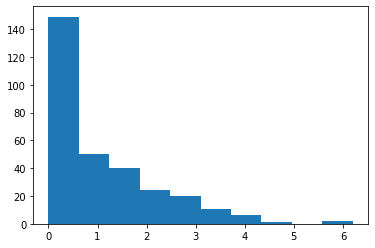

In [12]:
plt.hist(df['oldpeak'])
# ST depression induced by exercise relative to rest

(array([142.,   0.,   0.,   0.,   0., 140.,   0.,   0.,   0.,  21.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <BarContainer object of 10 artists>)

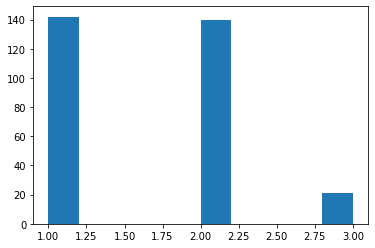

In [13]:
plt.hist(df['slope'])

(array([176.,   0.,  20.,   0.,   0.,  38.,   0.,  65.,   0.,   4.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

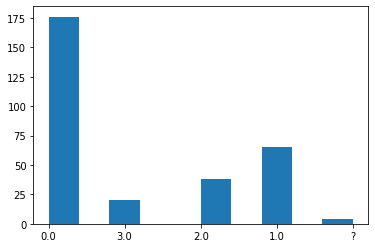

In [14]:
plt.hist(df['ca'])
# number of major vessels (0-3) colored by flourosopy

(array([ 18.,   0.,   0., 166.,   0.,   0., 117.,   0.,   0.,   2.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

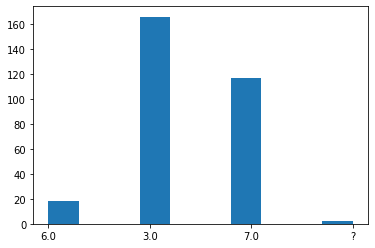

In [15]:
plt.hist(df['thal'])
# 3 = normal; 6 = fixed defect; 7 = reversable defect

(array([164.,   0.,  55.,   0.,   0.,  36.,   0.,  35.,   0.,  13.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

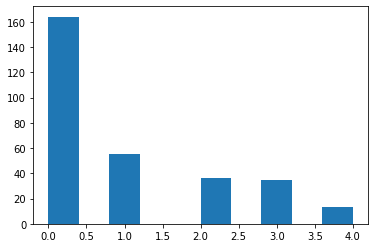

In [16]:
plt.hist(df['num'])

In [17]:
# bc = binary class
# 0 = No, 1 instead of 1,2,3,4 = Yes
df_bc = df.copy(deep=True)

df_bc['num'] = df_bc['num'].mask(df_bc['num']>0, 1)
df_bc.head(10)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,1
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,1
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


(array([164.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 139.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

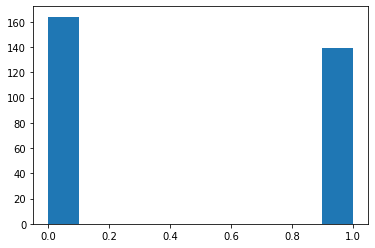

In [18]:
plt.hist(df_bc['num'])

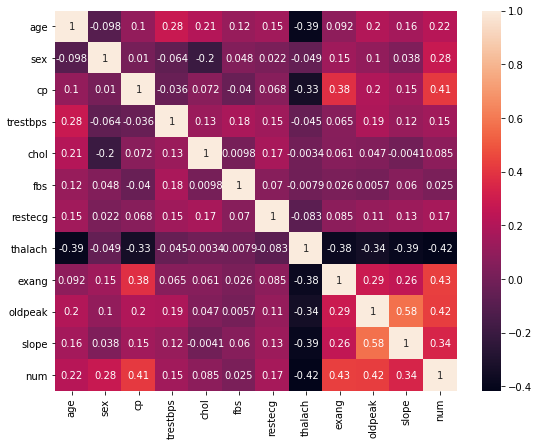

In [19]:
plt.figure(figsize=(9, 7))
corr = df_bc.corr()
sns.heatmap(corr, annot = True)
plt.show()

In [20]:
#Correlation with output variable
cor_target = abs(corr["num"])

#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.4]
relevant_features

cp         0.414446
thalach    0.417167
exang      0.431894
oldpeak    0.424510
num        1.000000
Name: num, dtype: float64

In [21]:
df_bc.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

([<matplotlib.patches.Wedge at 0x7f41e3b3bac0>,
 [Text(-0.9290050922463772, -0.5890242258008583, 'Male'),
  Text(1.0134601006324118, 0.642571882691845, 'Female')],
 [Text(-0.5067300503162057, -0.3212859413459227, '68.0%'),
  Text(0.59118505870224, 0.3748335982369095, '32.0%')])

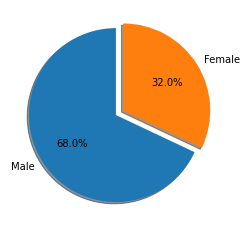

In [22]:
f , ax = plt.subplots()
# plt.pie(df_bc["sex"].value_counts(),explode=[0,.1],labels=["Male","Female"],startangle=90,shadow=True,autopct = '%1.1f%%')
plt.pie(df_bc["sex"].value_counts(),labels=["Male","Female"],startangle=90,explode=[0,0.1],shadow=True,autopct = '%1.1f%%')

/home/raian/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


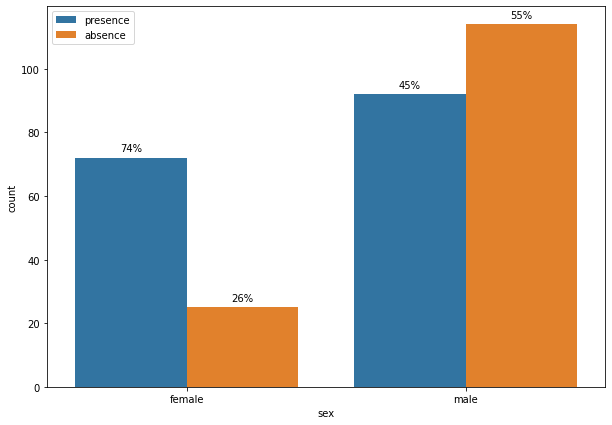

In [23]:
f,ax = plt.subplots(figsize=(10,7))
sns.countplot("sex",hue="num",data=df_bc)
bars = ax.patches
half = int(len(bars)/2)
ax.set_xticklabels(["female","male"])
ax.legend(["presence","absence"])
for first,second in (zip(bars[:half],bars[half:])):
    height1= first.get_height()
    height2= second.get_height()
    total = height1 + height2
    ax.text(first.get_x()+first.get_width()/2,height1+2,'{0:.0%}'.format(height1/total),ha="center")
    ax.text(second.get_x()+second.get_width()/2,height2+2,'{0:.0%}'.format(height2/total),ha="center")

In [24]:
# df_bc.loc[:,"age_band"] = pd.cut(df_bc.age,bins=[25,35,45,60,80])
# f,ax = plt.subplots(figsize=(10,8))
# sns.countplot("age_band",hue="num",data=df_bc)
# bars = ax.patches
# half = int(len(ax.patches)/2)
# ax.legend(["presence","absence"])

# for first,second in zip(bars[:half],bars[half:]):
#     height1 =  first.get_height()
#     height2 = second.get_height()
#     total_height= height1+height2
#     ax.text(first.get_x()+first.get_width()/2, height1+1,'{0:.0%}'.format(height1/total_height), ha ='center')
#     ax.text(second.get_x()+second.get_width()/2, height2+1,'{0:.0%}'.format(height2/total_height), ha ='center')

In [25]:
df_bc.num.value_counts()

0    164
1    139
Name: num, dtype: int64

In [26]:
# replaced ? with NaN
df_bc = df_bc.replace('?',np.nan)
df_bc

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [27]:
X = df_bc.iloc[:,0:13]
X.shape
X
y = df_bc.iloc[:,13]
y


0      0
1      1
2      1
3      0
4      0
      ..
298    1
299    1
300    1
301    1
302    0
Name: num, Length: 303, dtype: int64

In [28]:
# X10 = 10% missing data randomly inserted in dataframe


X10 = X.copy(deep=True)

import random
import collections

replaced = collections.defaultdict(set)
ix = [(row, col) for row in range(X10.shape[0]) for col in range(X10.shape[1])]
random.shuffle(ix)
to_replace = int(round(.1*len(ix)))  # 0.1 == 10% missing data 
for row, col in ix:
    if len(replaced[row]) < X10.shape[1] - 1:
        X10.iloc[row, col] = np.nan
        to_replace -= 1
        replaced[row].add(col)
        if to_replace == 0:
            break
            

In [29]:
X10.size
sum(X10.isna().sum())

400

In [30]:
# Test-Train splitting on 10% missing data

X_train10, X_test10, y_train10, y_test10 = train_test_split(X10, y, test_size=0.2, random_state=0, stratify=y)

In [31]:
X_train10

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
111,56.0,1.0,NaN,125.0,249.0,1.0,NaN,144.0,1.0,1.2,2.0,1.0,3.0
52,44.0,1.0,4.0,112.0,290.0,0.0,NaN,153.0,0.0,NaN,1.0,1.0,3.0
173,62.0,0.0,NaN,140.0,394.0,0.0,2.0,157.0,0.0,1.2,2.0,0.0,3.0
138,35.0,1.0,4.0,120.0,198.0,0.0,0.0,130.0,1.0,1.6,NaN,0.0,7.0
11,56.0,0.0,2.0,140.0,294.0,0.0,2.0,153.0,0.0,1.3,2.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,NaN,1.0,3.0,130.0,315.0,0.0,0.0,162.0,NaN,1.9,1.0,1.0,3.0
73,65.0,1.0,4.0,110.0,248.0,0.0,NaN,158.0,0.0,0.6,1.0,2.0,6.0
12,56.0,1.0,3.0,130.0,256.0,NaN,2.0,142.0,1.0,0.6,NaN,1.0,6.0
3,37.0,1.0,NaN,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0


In [32]:
y_train10.shape


(242,)

In [33]:
y_train10.where(y_train10==0).count()

131

In [34]:
y_train10.where(y_train10==1).count()

111

In [35]:
X_test10

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
125,45.0,0.0,2.0,130.0,234.0,0.0,2.0,NaN,0.0,0.6,2.0,0.0,NaN
83,NaN,1.0,NaN,180.0,274.0,1.0,2.0,150.0,1.0,1.6,2.0,0.0,7.0
53,44.0,1.0,2.0,130.0,219.0,0.0,2.0,188.0,NaN,0.0,1.0,0.0,3.0
45,NaN,1.0,3.0,112.0,230.0,0.0,NaN,165.0,0.0,2.5,2.0,1.0,7.0
248,52.0,1.0,NaN,125.0,NaN,0.0,0.0,168.0,NaN,1.0,NaN,2.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,29.0,1.0,2.0,130.0,204.0,0.0,2.0,202.0,0.0,0.0,NaN,0.0,3.0
15,57.0,1.0,NaN,150.0,168.0,0.0,NaN,174.0,0.0,1.6,1.0,0.0,3.0
96,59.0,1.0,NaN,110.0,239.0,0.0,2.0,142.0,1.0,NaN,2.0,1.0,7.0
208,55.0,1.0,2.0,130.0,262.0,0.0,NaN,155.0,0.0,0.0,1.0,0.0,NaN


In [36]:
y_test10.count()

61

In [37]:
y_test10.where(y_test10==0).count()

33

In [38]:
y_test10.where(y_test10==1).count()

28

In [39]:

sum(X_train10.isna().sum())


307

In [40]:
X_train10.size

3146

In [41]:
imp = SimpleImputer(strategy='most_frequent')
X_train10_ui = pd.DataFrame(imp.fit_transform(X_train10),columns=X_train10.columns)
X_train10_ui

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,56,1,4,125,249,1,0,144,1,1.2,2,1.0,3.0
1,44,1,4,112,290,0,0,153,0,0,1,1.0,3.0
2,62,0,4,140,394,0,2,157,0,1.2,2,0.0,3.0
3,35,1,4,120,198,0,0,130,1,1.6,1,0.0,7.0
4,56,0,2,140,294,0,2,153,0,1.3,2,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,58,1,3,130,315,0,0,162,0,1.9,1,1.0,3.0
238,65,1,4,110,248,0,0,158,0,0.6,1,2.0,6.0
239,56,1,3,130,256,0,2,142,1,0.6,1,1.0,6.0
240,37,1,4,130,250,0,0,187,0,3.5,3,0.0,3.0


In [42]:
sc = StandardScaler()
X_train10_ui = sc.fit_transform(X_train10_ui)


In [43]:
svm10 = svm.SVC()
svm10.fit(X_train10_ui,y_train10)

SVC()

In [44]:
y_train_pred10 = svm10.predict(X_train10_ui)

In [45]:
f1_score(y_train10, y_train_pred10)

0.8682926829268293

In [46]:
X_test10_ui = pd.DataFrame(imp.fit_transform(X_test10),columns=X_test10.columns)
X_test10_ui

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,45,0,2,130,234,0,2,120,0,0.6,2,0.0,3.0
1,54,1,4,180,274,1,2,150,1,1.6,2,0.0,7.0
2,44,1,2,130,219,0,2,188,0,0,1,0.0,3.0
3,54,1,3,112,230,0,2,165,0,2.5,2,1.0,7.0
4,52,1,4,125,177,0,0,168,0,1,1,2.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,29,1,2,130,204,0,2,202,0,0,1,0.0,3.0
57,57,1,4,150,168,0,2,174,0,1.6,1,0.0,3.0
58,59,1,4,110,239,0,2,142,1,0,2,1.0,7.0
59,55,1,2,130,262,0,2,155,0,0,1,0.0,3.0


In [47]:
X_test10_ui = sc.transform(X_test10_ui)

In [48]:
y_test_pred10 = svm10.predict(X_test10_ui)

In [49]:
f1_score(y_test10, y_test_pred10)

0.7037037037037038

In [50]:
cm = confusion_matrix(y_train10, y_train_pred10,)
cm 

array([[126,   5],
       [ 22,  89]])

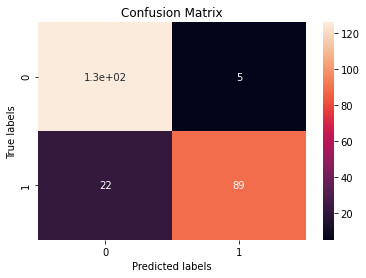

In [51]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels([0, 1]); ax.yaxis.set_ticklabels([0, 1]);

In [52]:
# X_set, Y_set = X_train10_ui, y_train10


# X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
#                      np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
# plt.contourf(X1, X2, svm10.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
#              alpha = 0.75, cmap = ListedColormap(('red', 'blue')))
# plt.xlim(X1.min(), X1.max())
# plt.ylim(X2.min(), X2.max())
# for i, j in enumerate(np.unique(Y_set)):
#     plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1],
#                 c = ListedColormap(('red', 'blue'))(i), label = j)
# plt.title('SVM (Training set)')
# plt.xlabel('Age')
# plt.ylabel('Estimated Salaries')
# plt.legend()
# plt.show()

In [53]:
# # evaluate model
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# # report performance
# print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))